In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [97]:
df = pd.read_csv('titanic_toy.csv')

In [98]:
df.sample(5)

,Age,Fare,Family,Survived
138,16.0,9.2167,0,0
183,1.0,39.0000,3,1
798,30.0,7.2292,0,0
222,51.0,8.0500,0,0
395,22.0,7.7958,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [100]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [101]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [103]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [104]:
X_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [105]:
X_train.isnull().mean()*100 # % empty value

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [106]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()


In [107]:
X_train['Age_Median'] = X_train['Age'].fillna(median_age)
X_train['Age_Mean'] = X_train['Age'].fillna(mean_age)


X_train['Fare_Median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_Mean'] = X_train['Fare'].fillna(mean_fare)

In [108]:
X_train.sample(5)

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
174,56.0,30.6958,0,56.00,56.000000,30.6958,30.6958
240,NaN,14.4542,1,28.75,29.785904,14.4542,14.4542
535,7.0,26.2500,2,7.00,7.000000,26.2500,26.2500
883,28.0,10.5000,0,28.00,28.000000,10.5000,10.5000
85,33.0,15.8500,3,33.00,33.000000,15.8500,15.8500


In [109]:
print('Varience od Age Originally:',X_train['Age'].var())
print('Varience of Age Variable after Mean:',X_train['Age_Mean'].var())
print('Varience of Age Variable after Median:',X_train['Age_Median'].var())


print('Varience od Fare Originally:',X_train['Fare'].var())
print('Varience of Fare Variable after Mean:',X_train['Fare_Mean'].var())
print('Varience of Fare Variable after Median:',X_train['Fare_Median'].var())


Varience od Age Originally: 204.34951339046142
Varience of Age Variable after Mean: 161.81262452718676
Varience of Age Variable after Median: 161.98956633460548
Varience od Fare Originally: 2448.1979137063163
Varience of Fare Variable after Mean: 2324.2385256705534
Varience of Fare Variable after Median: 2340.09102197536


## Note:
      1. If the varience before and after mean/median imputation changes drastically hence it is a red alert.
      2. Age has large number of None value which lead to slightly larger change w.r.t to fare that has less none values.

### Change in Distributions

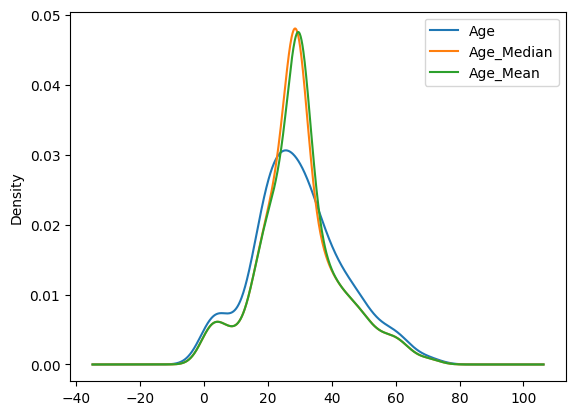

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind = 'kde', ax=ax)

X_train['Age_Median'].plot(kind = 'kde', ax=ax)

X_train['Age_Mean'].plot(kind = 'kde', ax=ax)

lines,labels = ax.get_legend_handles_labels()

ax.legend(lines,labels,loc='best')



#### Red Flag as the distribution changes for Age

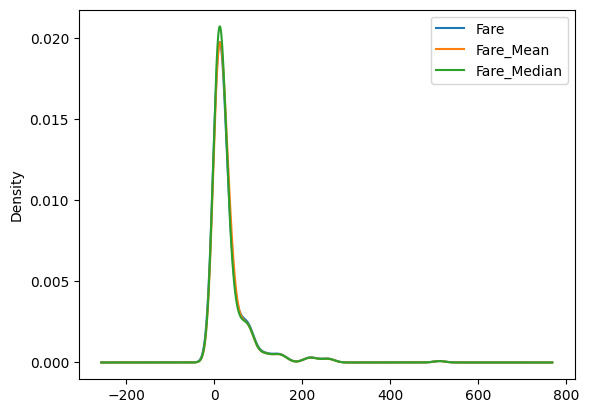

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind = 'kde', ax=ax)

X_train['Fare_Mean'].plot(kind = 'kde', ax=ax)

X_train['Fare_Median'].plot(kind = 'kde', ax=ax)

lines,labels = ax.get_legend_handles_labels()

ax.legend(lines,labels,loc='best') 


##### Green Falg for Fare Column it is OK

In [112]:
X_train.cov()

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_Median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_Mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_Median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_Mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [113]:
X_train.corr()

,Age,Fare,Family,Age_Median,Age_Mean,Fare_Median,Fare_Mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_Median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_Mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_Median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_Mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

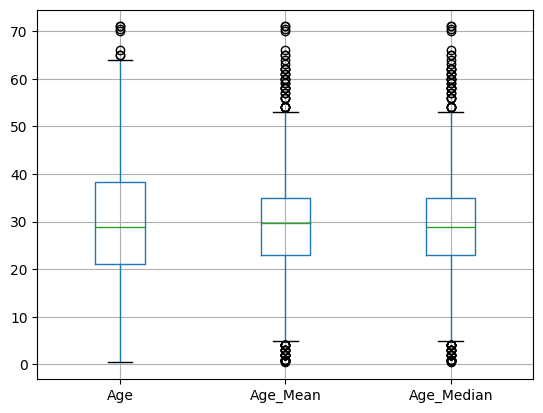

In [114]:
X_train[['Age','Age_Mean','Age_Median']].boxplot() # outlier  is added in mean , median which was not.

<Axes: >

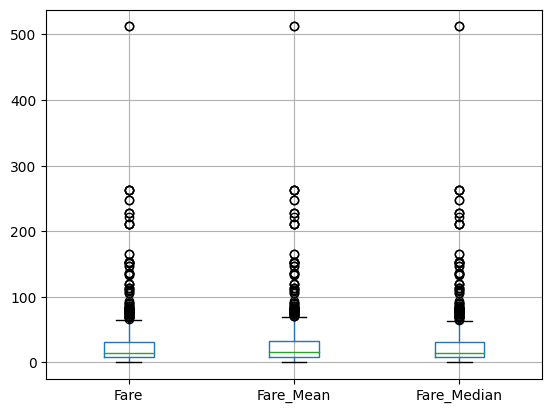

In [115]:
X_train[['Fare','Fare_Mean','Fare_Median']].boxplot()

## Note
      1: It is clear from above mean/median imputation is not good for age , but it is good with fare.

## Using Sklearn

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [117]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [118]:
trf = ColumnTransformer(
    [
        ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Fare'])
    ],remainder='passthrough'
)

In [119]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [120]:
trf.named_transformers_['imputer1'].statistics_

array([29.49884615])

In [121]:
trf.named_transformers_['imputer2'].statistics_

array([14.4])

In [122]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [123]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

# Arbitrary Value Imputer

In [124]:
df = pd.read_csv('titanic_toy.csv')

In [125]:
df.sample(5)

,Age,Fare,Family,Survived
767,30.5,7.7500,0,0
259,50.0,NaN,1,1
395,22.0,7.7958,0,0
356,22.0,55.0000,1,1
482,50.0,8.0500,0,0


In [126]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [127]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [128]:
X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [129]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [131]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_Minus_1'] = X_train['Age'].fillna(-1)


X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_Minus_1'] = X_train['Fare'].fillna(-1)

In [132]:
print('Varience od Age Originally:',X_train['Age'].var())
print('Varience of Age Variable after replacing missing value by 99:',X_train['Age_99'].var())
print('Varience of Age Variable after replacing missing value by -1:',X_train['Age_Minus_1'].var())


print('Varience od Fare Originally:',X_train['Fare'].var())
print('Varience of Fare Variable after replacing missing value by 99:',X_train['Fare_99'].var())
print('Varience of Fare Variable after replacing missing value by -1:',X_train['Fare_Minus_1'].var())

Varience od Age Originally: 210.2517072477435
Varience of Age Variable after replacing missing value by 99: 932.9665366701432
Varience of Age Variable after replacing missing value by -1: 315.9955036260055
Varience od Fare Originally: 2761.0314349486343
Varience of Fare Variable after replacing missing value by 99: 2833.708690936761
Varience of Fare Variable after replacing missing value by -1: 2675.2394049177024


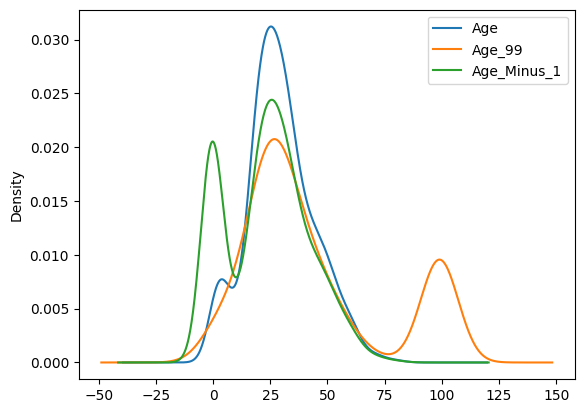

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind = 'kde', ax=ax)

X_train['Age_99'].plot(kind = 'kde', ax=ax)

X_train['Age_Minus_1'].plot(kind = 'kde', ax=ax)

lines,labels = ax.get_legend_handles_labels()

ax.legend(lines,labels,loc='best')

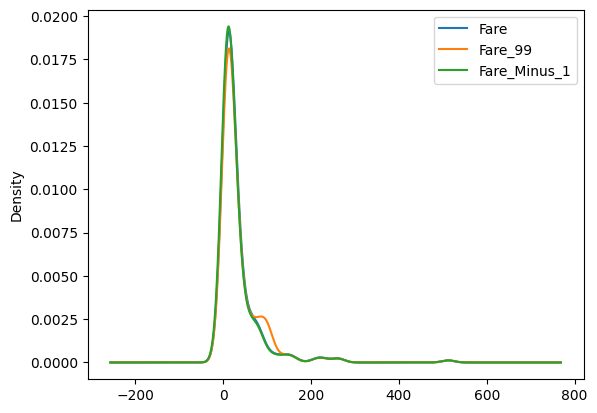

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind = 'kde', ax=ax)

X_train['Fare_99'].plot(kind = 'kde', ax=ax)

X_train['Fare_Minus_1'].plot(kind = 'kde', ax=ax)

lines,labels = ax.get_legend_handles_labels()

ax.legend(lines,labels,loc='best')

In [135]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_Minus_1,Fare_99,Fare_Minus_1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,75.273024,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,17.603852,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-116.528480,-101.137070
Age_Minus_1,210.251707,135.785804,-5.034556,-166.460682,315.995504,138.114503,124.270305
Fare_99,75.273024,2761.031435,17.603852,-116.528480,138.114503,2833.708691,2514.109946
Fare_Minus_1,69.137162,2761.031435,17.684447,-101.137070,124.270305,2514.109946,2675.239405


In [136]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_Minus_1,Fare_99,Fare_Minus_1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.091016,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.196548,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.071667,-0.064017
Age_Minus_1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.145956,0.135159
Fare_99,0.091016,1.000000,0.196548,-0.071667,0.145956,1.000000,0.913115
Fare_Minus_1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.913115,1.000000


## Sklearn

In [137]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [138]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [139]:
trf = ColumnTransformer(
    [
        ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Fare'])
    ],remainder='passthrough'
)

In [140]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [141]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [142]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [143]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [144]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])